In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.ndimage.interpolation import shift
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sn

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    

In [24]:
from sklearn.datasets import fetch_openml

### MNIST

In [25]:
mnist = fetch_openml('mnist_784', version=1)

In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
mnist["feature_names"]

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [28]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [29]:
mnist["details"]

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [30]:
mnist["categories"]

{}

In [31]:
X, y = mnist["data"], mnist["target"]

In [32]:
X.shape

(70000, 784)

In [33]:
y.shape

(70000,)

In [34]:
import matplotlib as mpl

In [35]:
import matplotlib.pyplot as plt

In [36]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
some_digit_image.shape

(28, 28)

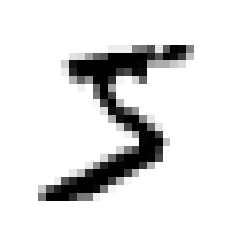

'5'

In [37]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
y[0]

In [38]:
import numpy as np
y = y.astype(np.uint8)

In [39]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
print(y_train_5.shape, y_test_5.shape)

(60000,) (10000,)


In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.predict([some_digit])

array([ True])

### Measuring Accuracy Using Cross-Validation

In [23]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone 

skfolds = StratifiedKFold ( n_splits = 3 , shuffle = True , random_state = 42 ) 

for train_index , test_index in skfolds.split( X_train , y_train_5 ): 
    clone_clf = clone ( sgd_clf ) 
    X_train_folds = X_train [ train_index ] 
    y_train_folds = y_train_5 [ train_index ] 
    X_test_fold = X_train [ test_index ] 
    y_test_fold = y_train_5 [ test_index ] 
    
    clone_clf.fit( X_train_folds , y_train_folds) 
    y_pred = clone_clf.predict( X_test_fold ) 
    n_correct = sum ( y_pred == y_test_fold ) 
    print ( n_correct / len ( y_pred )) # prints 0.9502, 0.96565, and 0.96495

0.9669
0.91625
0.96785


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [26]:
from sklearn.base import BaseEstimator 
class Never5Classifier ( BaseEstimator ): 
    def fit ( self , X , y = None ): 
        return self 
    def predict ( self , X ): 
        return np . zeros (( len ( X ), 1 ), dtype = bool )

In [27]:
never_5_clf = Never5Classifier ()
cross_val_score ( never_5_clf , X_train , y_train_5 , cv = 3 , scoring = "accuracy" )

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [31]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix (y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score , recall_score
print(precision_score ( y_train_5 , y_train_pred )) # == 4096 / (4096 + 1522)
print(recall_score ( y_train_5 , y_train_pred )) # == 4096 / (4096 + 1325)

0.8370879772350012
0.6511713705958311


In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Trade-off

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [37]:
threshold = 8000
y_some_digit_pred = ( y_scores > threshold )
y_some_digit_pred

array([False])

How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds:

In [39]:
from sklearn.metrics import precision_recall_curve 
precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)
print(thresholds.shape, precisions.shape, recalls.shape)

(59966,) (59967,) (59967,)


Finally, use Matplotlib to plot precision and recall as functions of the threshold value ( Figure 3-4 ):

Saving figure precision_recall_vs_threshold_plot


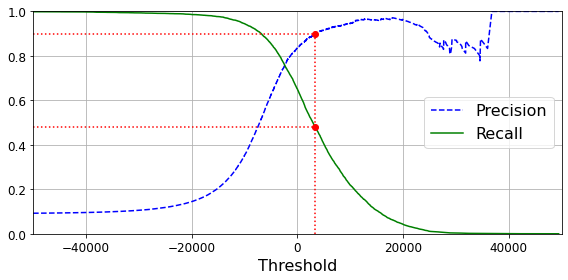

In [40]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--" , label = "Precision") 
    plt.plot(thresholds, recalls [:-1], "g-" , label = "Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                             
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plt.axis([-50000, 50000, 0, 1])  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

In [41]:
(y_train_pred == (y_scores > 0)).all()

True

In [42]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [43]:
y_scores > 0

array([ True, False, False, ...,  True, False, False])

Another way to select a good precision/recall trade-off is to plot precision directly against recall, as shown in Figure 3-5 (the same threshold as earlier is highlighted).

In [44]:
recalls.shape

(59967,)

In [45]:
precisions.shape

(59967,)

Saving figure precision_vs_recall_plot


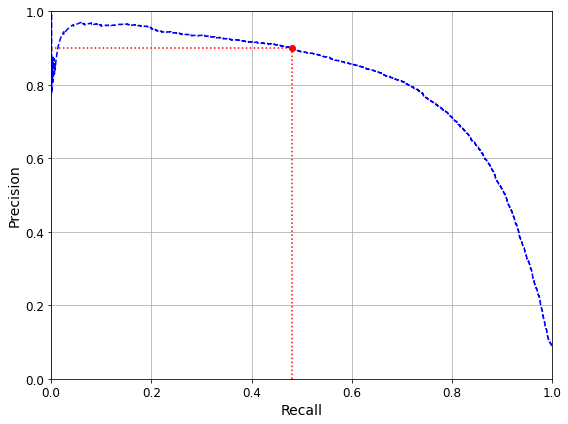

In [46]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", label = "PrecisionVSRecall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision, recall_90_precision], [0, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")   
save_fig("precision_vs_recall_plot")
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. But of course, the choice depends on your project. 

Suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision ( np.argmax() will give you the first index of the maximum value, which in this case means the first True value):

In [47]:
#just for fun
# thresholds_equal_precision_recall = thresholds[recalls[:-1] == precisions[:-1]]
# print(thresholds_equal.shape)
# print(thresholds_equal)
# index_of_req_threshold = np.where(thresholds == thresholds_equal_precision_recall)[0][0]
# print(index_of_req_threshold)
# print(recalls[:-1][index_of_req_threshold])
# print(precisions[:-1][index_of_req_threshold])

In [48]:
threshold_90_precision = thresholds [np.argmax(precisions >= 0.9)] # ~7816

In [49]:
threshold_90_precision

3370.0194991439557

To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can run this code:

In [50]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [51]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [52]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity . Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [53]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


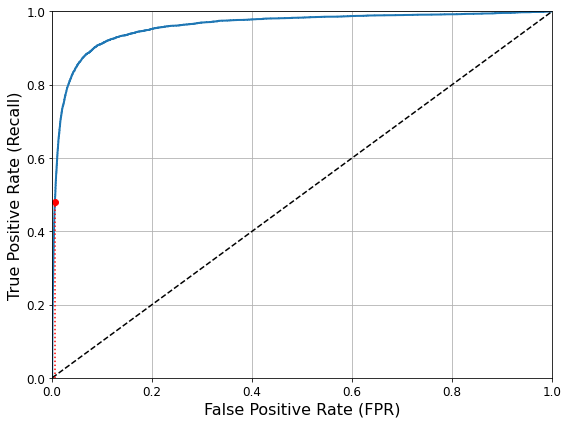

In [54]:
def plot_roc_curve (fpr, tpr,label = None): 
    plt.plot(fpr, tpr, linewidth = 2, label = label) 
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal [ ... ] 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (FPR)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr,tpr) 
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")               
save_fig("roc_curve_plot")                                    
plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. 
    
One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [55]:
from sklearn.metrics import roc_auc_score 
roc_auc_score( y_train_5 , y_scores)

0.9604938554008616

Tip 
Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42) 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba" )
y_probas_forest.shape

(60000, 2)

In [57]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [58]:
y_probas_forest[:, 1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

The roc_curve() function expects labels and scores, but instead of scores you can give it class probabilities. Let’s use the positive class’s probability as the score:

In [59]:
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

Saving figure roc_curve_comparison_plot


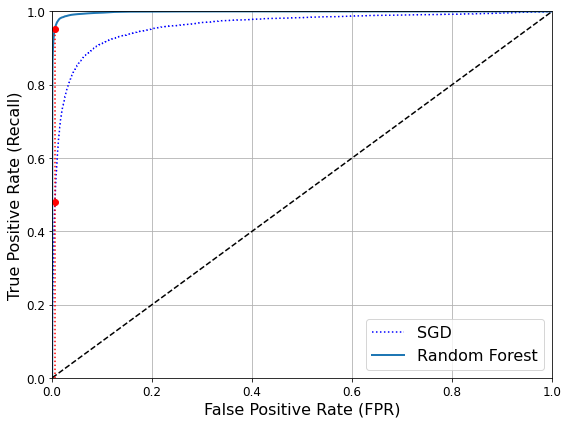

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", label = "SGD") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 

plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([0.0, fpr_90], [recall_for_forest, recall_for_forest], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90], [recall_for_forest], "ro")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [61]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [62]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [63]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [64]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5 , y_scores_forest)

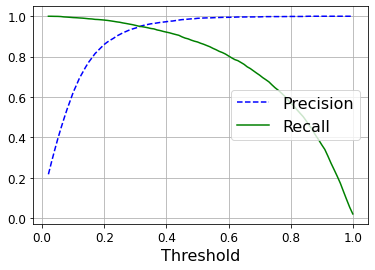

In [65]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest) 
plt.show()

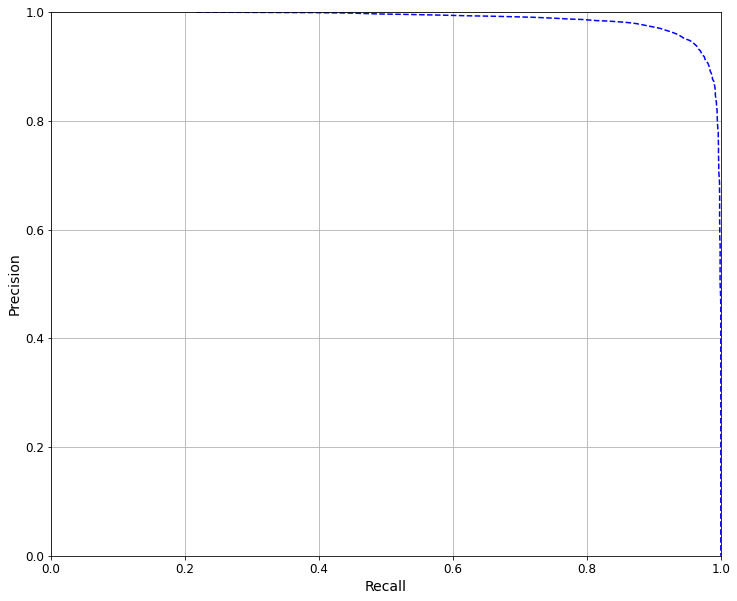

In [66]:
plt.figure(figsize=(12,10))
plot_precision_vs_recall(recalls_forest, precisions_forest)

You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall trade-off that fits your needs, and use ROC curves and ROC AUC scores to compare various models.

### Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers ) can distinguish between more than two classes.

In [67]:
from sklearn.svm import SVC 
svm_clf = SVC() 
svm_clf.fit(X_train, y_train) # y_train, not y_train_5 
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [68]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [69]:
np.argmax(some_digit_scores)

5

In [70]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [71]:
svm_clf.classes_[5]

5

In [74]:
from sklearn.multiclass import OneVsRestClassifier 
ovr_clf = OneVsRestClassifier(SVC()) 
ovr_clf.fit(X_train, y_train) 
print(ovr_clf.predict([some_digit]))
print(len(ovr_clf.estimators_))

[5]
10


In [75]:
sgd_clf.fit(X_train ,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [76]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [77]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

In [80]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [81]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

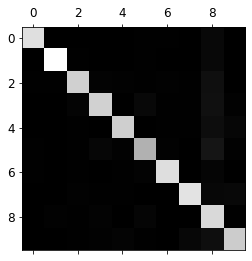

In [82]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad): Fill the diagonal with zeros to keep only the errors, and plot the result:

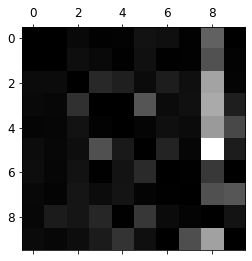

In [84]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [87]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [88]:
norm_conf_mx = conf_mx / row_sums

In [51]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s (the plot_digits() function just uses Matplotlib’s imshow() function; see this chapter’s Jupyter notebook for details):

In [ ]:
cl_a , cl_b = 3 , 5 
X_aa = X_train [( y_train == cl_a ) & ( y_train_pred == cl_a )] 
X_ab = X_train [( y_train == cl_a ) & ( y_train_pred == cl_b )] 
X_ba = X_train [( y_train == cl_b ) & ( y_train_pred == cl_a )] 
X_bb = X_train [( y_train == cl_b ) & ( y_train_pred == cl_b )] 

plt . figure ( figsize = ( 8 , 8 )) 
plt . subplot ( 221 ); plot_digits ( X_aa [: 25 ], images_per_row = 5 ) 
plt . subplot ( 222 ); plot_digits ( X_ab [: 25 ], images_per_row = 5 ) 
plt . subplot ( 223 ); plot_digits ( X_ba [: 25 ], images_per_row = 5 ) 
plt . subplot ( 224 ); plot_digits ( X_bb [: 25 ], images_per_row = 5 ) 
save_fig("error_analysis_digits_plot")
plt . show ()

### Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you may want your classifier to output multiple classes for each instance. Consider a face-recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is called a multilabel classification system.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
y_train_large = ( y_train >= 7 )
y_train_odd = ( y_train % 2 == 1 ) 
y_multilabel = np.c_[ y_train_large , y_train_odd ] 
knn_clf = KNeighborsClassifier () 
knn_clf.fit ( X_train , y_multilabel )

In [ ]:
knn_clf.predict([some_digit])

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. One approach is to measure the F 1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F 1 score across all labels:

In [ ]:
y_train_knn_pred = cross_val_predict ( knn_clf , X_train , y_multilabel , cv = 3 )
f1_score( y_multilabel , y_train_knn_pred , average = "macro" )

This assumes that all labels are equally important, however, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.

### Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification ). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.
Let’s start by creating the training and test sets by taking the MNIST images and adding noise to their pixel intensities with NumPy’s randint() function. The target images will be the original images:

In [ ]:
noise = np . random . randint ( 0 , 100 , ( len ( X_train ), 784 )) 
X_train_mod = X_train + noise 
noise = np . random . randint ( 0 , 100 , ( len ( X_test ), 784 )) 
X_test_mod = X_test + noise 
y_train_mod = X_train 
y_test_mod = X_test

In [ ]:
some_index = 0

some_digit = X_test[some_index]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

some_digit_mod = X_test_mod[some_index]
some_digit_image_mod = some_digit_mod.reshape(28, 28)
plt.imshow(some_digit_image_mod, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod) 
clean_digit = knn_clf.predict([X_test_mod[some_index]]) 
plot_digits(clean_digit)

# EXERCISES

# 1

In [40]:
kn_clf = KNeighborsClassifier()

In [41]:
param_dist = [
    {'n_neighbors': [2, 3, 4, 5, 6], 
     'weights': ['uniform', 'distance'],
    }]

In [42]:
grid_search = GridSearchCV(kn_clf, param_dist, cv=5, return_train_score=True, verbose=3, n_jobs=4)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 320.6min


In [ ]:
grid_search.best_params_ #{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
grid_search.cv_results_.keys()

In [ ]:
cvres = grid_search.cv_results_
for score, params in sorted(zip(cvres["mean_train_score"], cvres["params"])):
    print(score, params)

In [ ]:
best_kn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
best_kn_clf.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = best_kn_clf.predict(X_train_scaled)
accuracy_score(y_train, y_train_pred)

In [ ]:
y_test_pred = best_kn_clf.predict_proba(X_test_scaled)
accuracy_score(y_test, y_test_pred)

In [19]:
def print_confusion_matrix(y_data, y_pred):
    
    conf_mx = confusion_matrix(y_data, y_train_pred)
    print("Confusion matrix values:")
    print(conf_mx)
    print()
    
    sn.set(font_scale=1.4)
    sn.heatmap(conf_mx, annot=True, annot_kws={"size": 16})
    plt.show()
    
    # normalized confusion matrix
    row_sums=conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    sn.set(font_scale=1.4)
    sn.heatmap(norm_conf_mx, annot=True, annot_kws={"size": 16})
    plt.show()

In [ ]:
print_confusion_matrix(y_train, y_train_pred)

In [ ]:
print_confusion_matrix(y_test, y_test_pred)

# 2

In [149]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [150]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
def augment_data(X, y):
    X_augmented = [image for image in X]
    y_augmented = [label for label in y]

    for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
        for image, label in zip(X, y):
            X_augmented.append(shift_image(image, dx, dy))
            y_augmented.append(label)

    X_augmented = np.array(X_augmented)
    y_augmented = np.array(y_augmented)
    
    return X_augmented, y_augmented

In [151]:
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)
X_test_augmented, y_test_augmented = augment_data(X_test, y_test)

(300000, 784)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
X_test_augmented = X_test_augmented[shuffle_idx]
y_test_augmented = y_test_augmented[shuffle_idx]

In [ ]:
scaler = StandardScaler()
X_train_augmented_scaled = scaler.fit_transform(X_train_augmented.astype(np.float64))
X_test_augmented_scaled = scaler.fit_transform(X_test_augmented.astype(np.float64))

In [ ]:
best_kn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
best_kn_clf.fit(X_train_augmented_scaled, y_train_augmented)

In [ ]:
y_train_pred = best_kn_clf.predict(X_train_augmented_scaled)
accuracy_score(y_train_augmented, y_train_pred)

In [148]:
print_confusion_matrix(y_train_augmented, y_train_pred)

In [ ]:
y_test_pred = best_kn_clf.predict(X_test_augmented_scaled)
accuracy_score(y_test_augmented, y_test_pred)

In [ ]:
print_confusion_matrix(y_test_augmented, y_test_pred)